## Categorising countries - Model Answer

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Random state seed
rseed = 42

# Setting the stying of the Seaborn figure
sns.set_style('darkgrid')

## Load Data

In [ ]:
# Import the dataset
org_df = pd.read_csv('Country-data.csv')
org_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Check the shape
org_df.shape

(167, 10)

In [ ]:
# Check datatypes & counts
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Get descriptive statistics
org_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# Identify any missing data
org_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [ ]:
# Drop any non-numeric features (columns)
df = org_df.drop(columns='country')

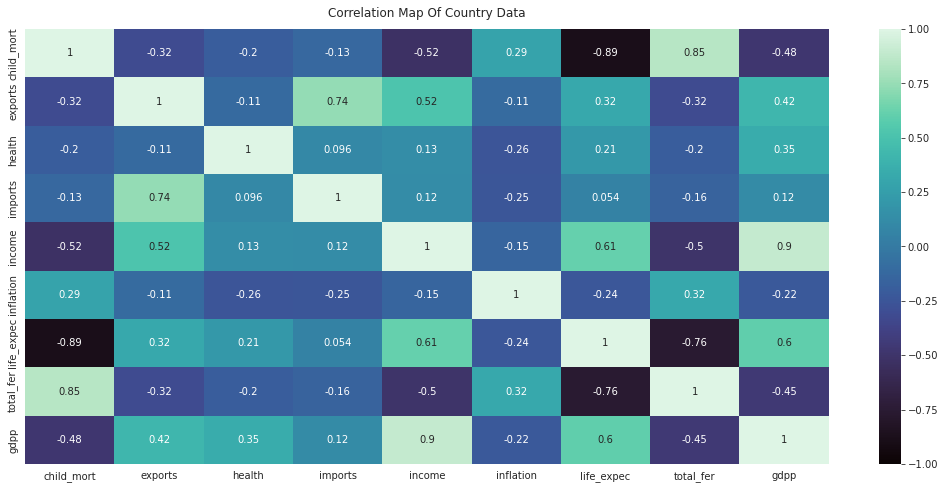

In [ ]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'mako')
plt.title('Correlation Map Of Country Data', fontdict={'fontsize':12}, pad=12);

 The correlation map gives us an understanding of the relationships between the features.

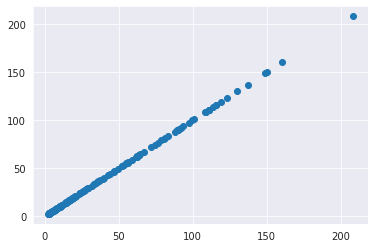

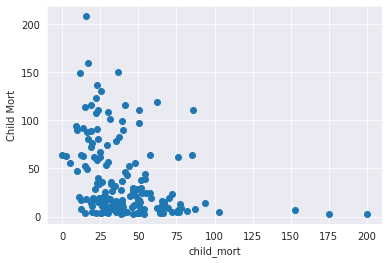

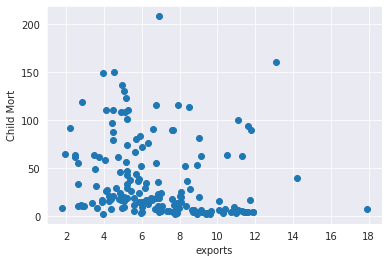

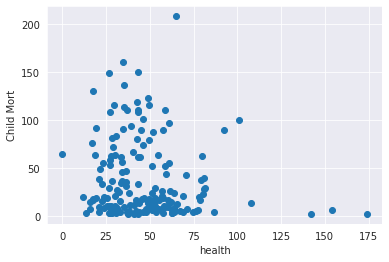

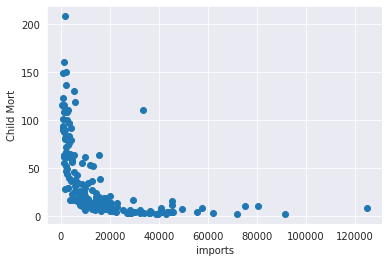

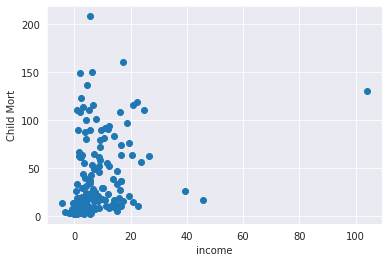

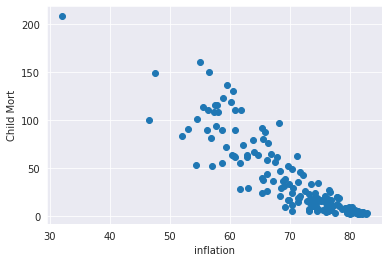

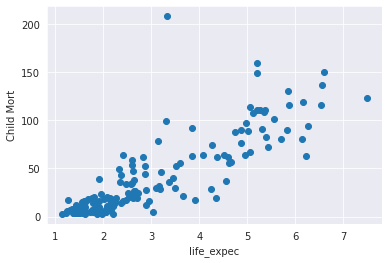

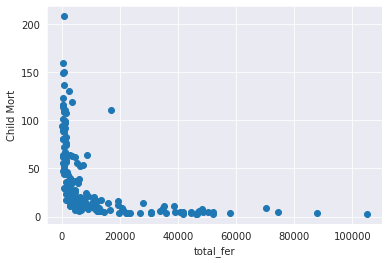

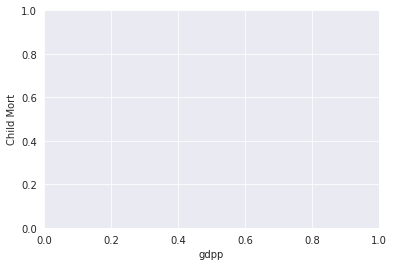

In [ ]:
# Explore the continuous independent features against child_mort using scatter plots.
for f in df.columns:
  plt.scatter(df[f], df['child_mort'])
  plt.show()
  plt.xlabel(f)
  plt.ylabel('Child Mort')

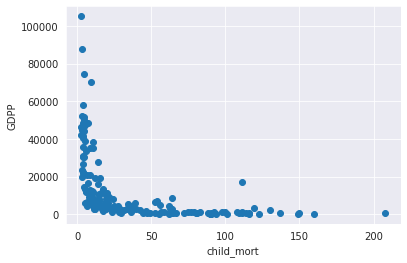

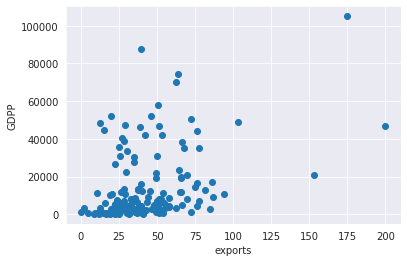

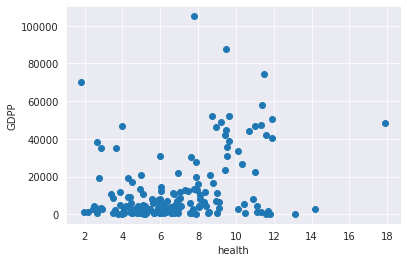

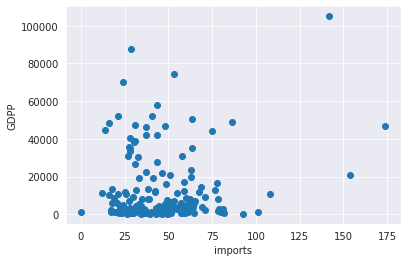

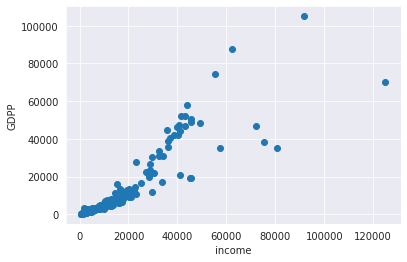

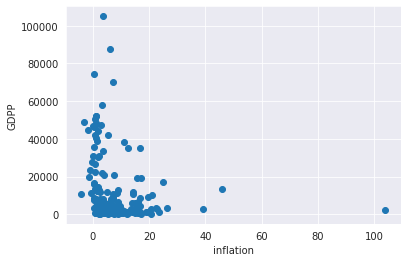

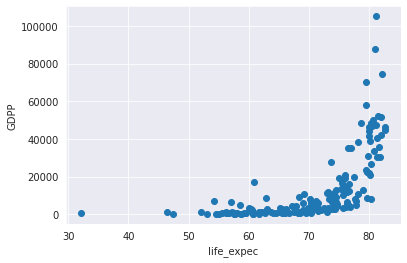

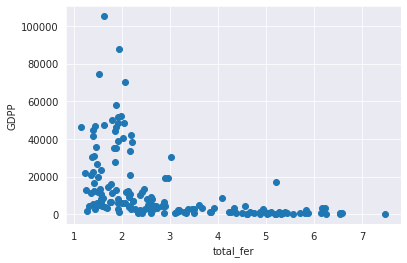

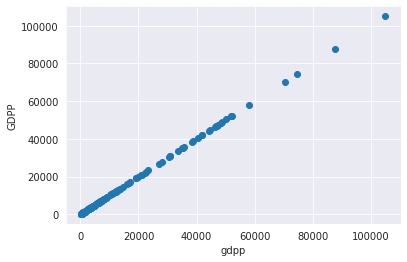

In [ ]:
# Explore the continuous independent features against gdpp using scatter plots.
for f in df.columns:
  plt.scatter(df[f], df['gdpp'])
  plt.xlabel(f)
  plt.ylabel('GDPP')
  plt.show()


Creating a pair plot is a helpful step in exploring the relationships between features before clustering data. The diagonal plots within a pair plot show the distribution of individual features, which can give insight into how the data is spread for each feature. While distinct peaks in these plots may hint at features with distinct ranges, true separability is better assessed by examining the off-diagonal plots, which show the relationships between pairs of features. These relationships provide a clearer view of how well the data might separate into clusters.

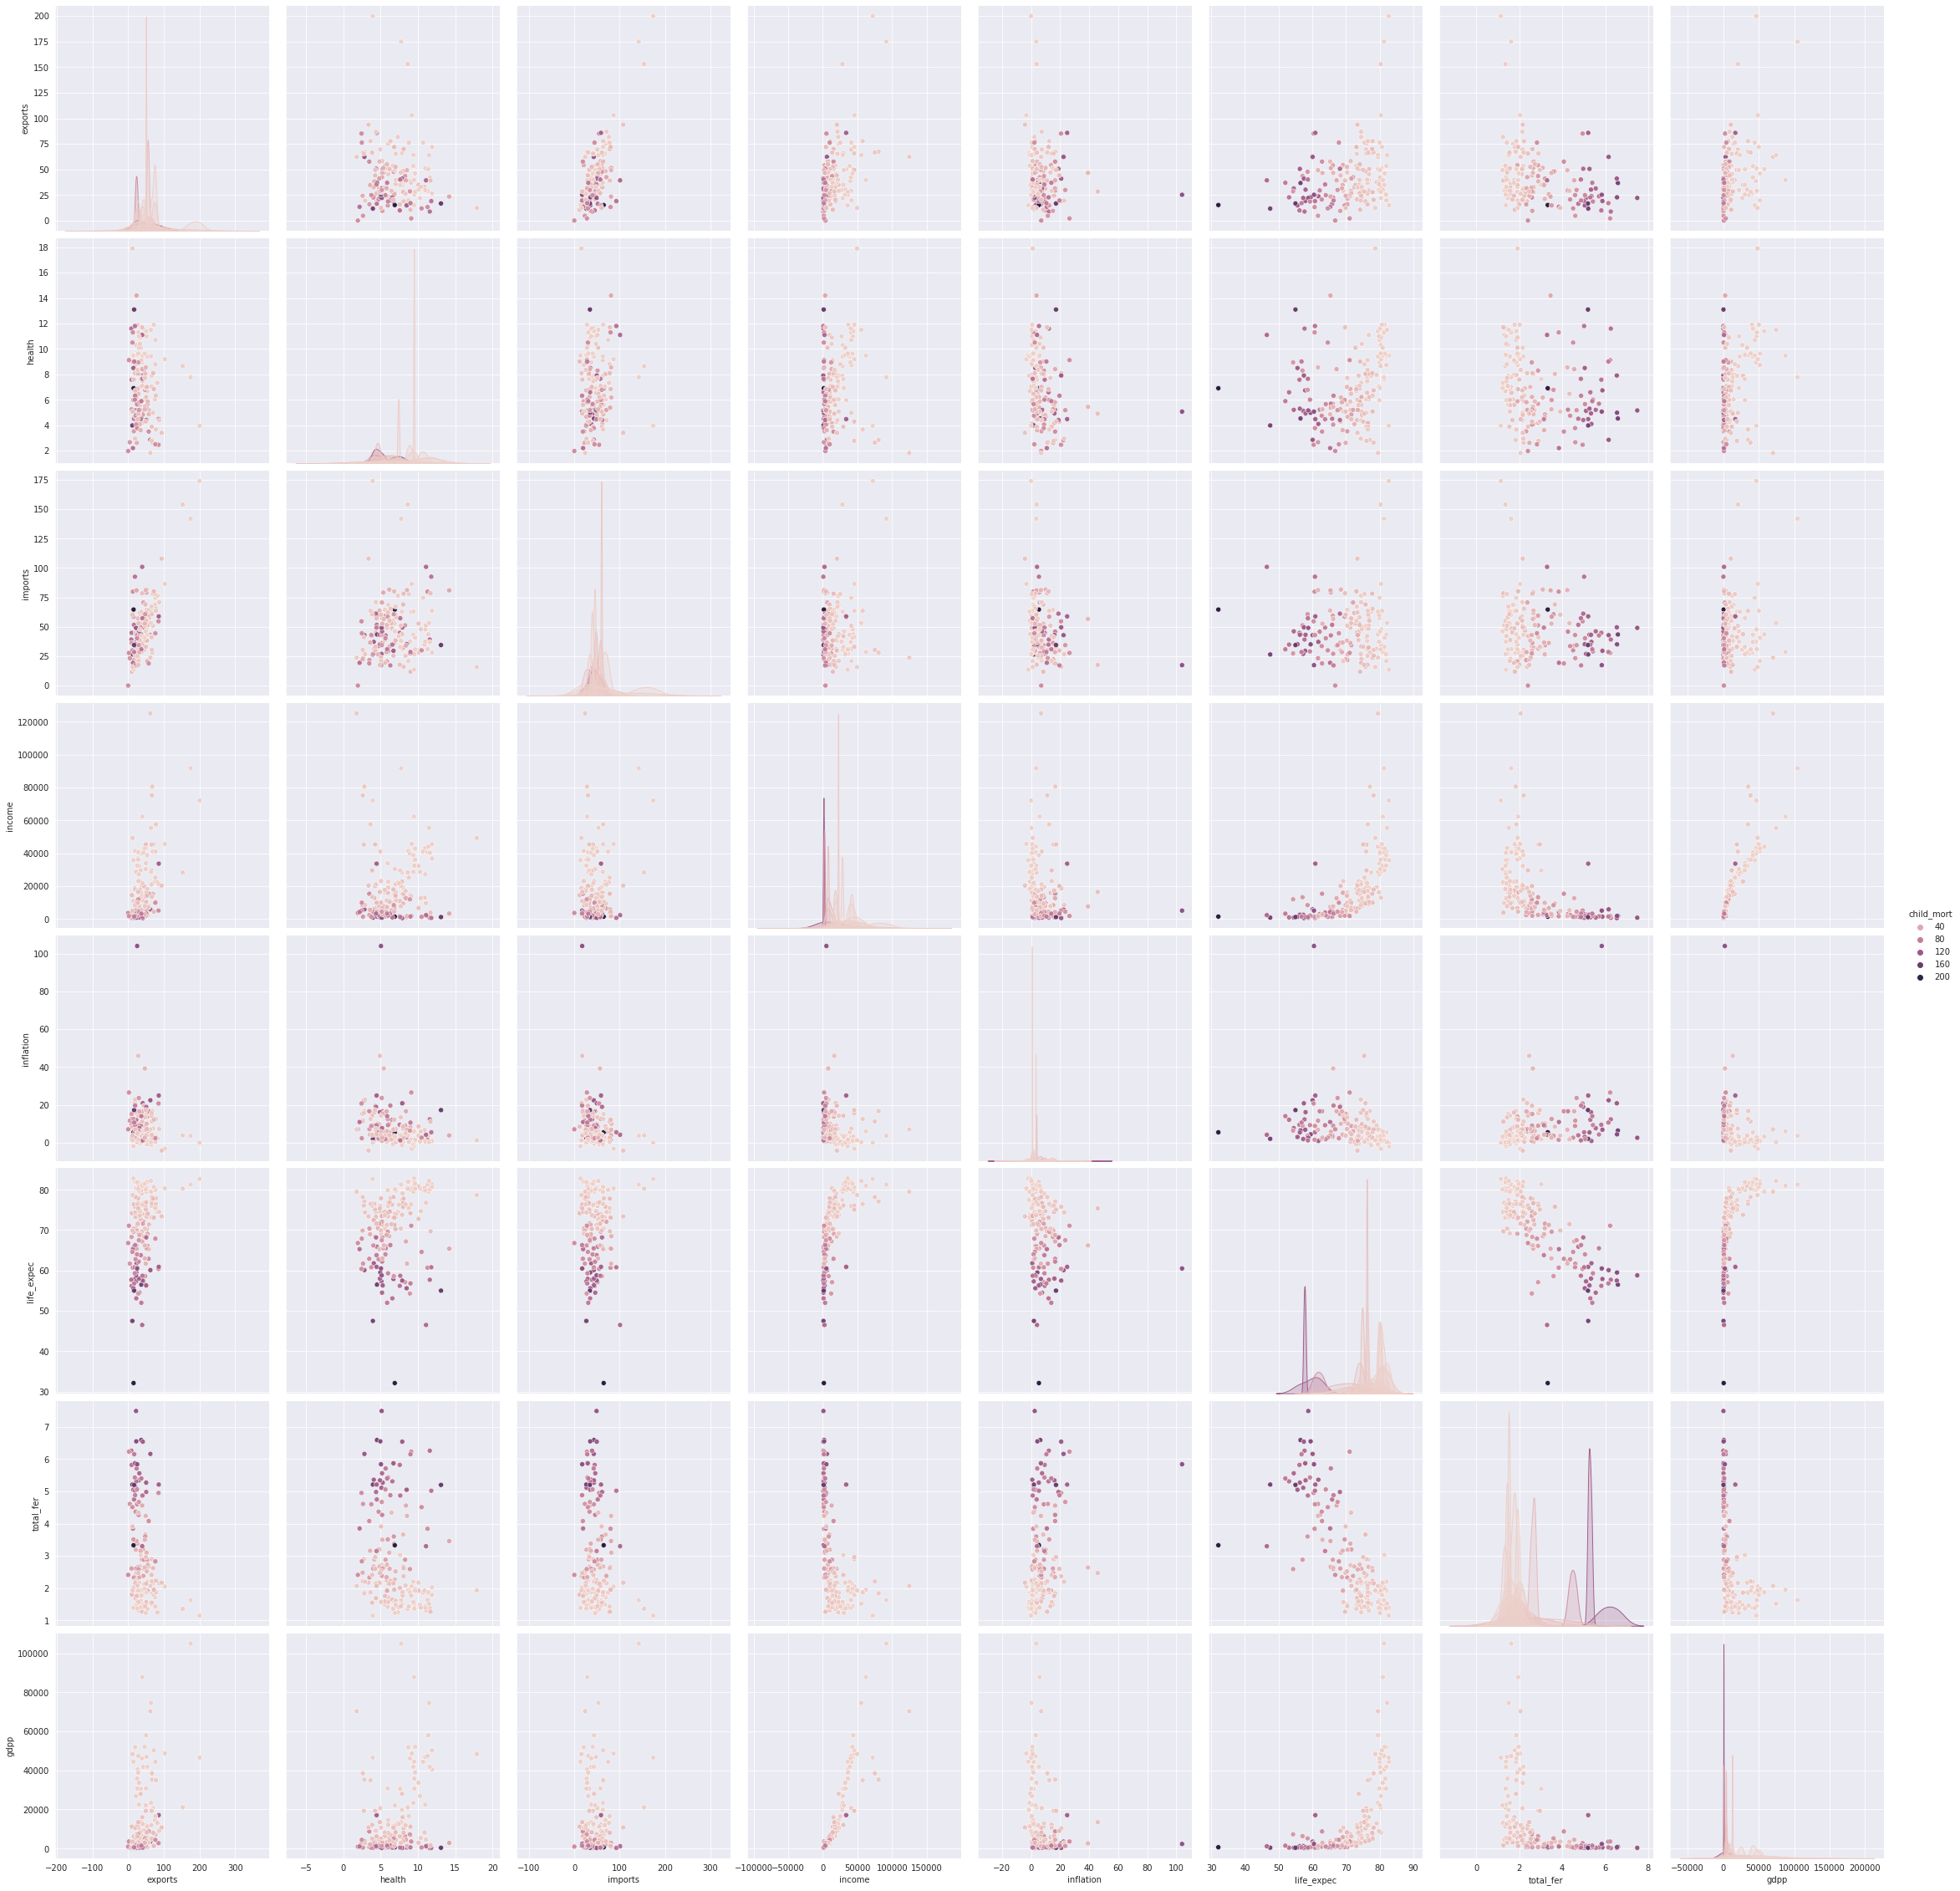

In [ ]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(data=df, hue='child_mort', aspect=1, height=4)
plt.show()

### Scaling the Data

In [ ]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

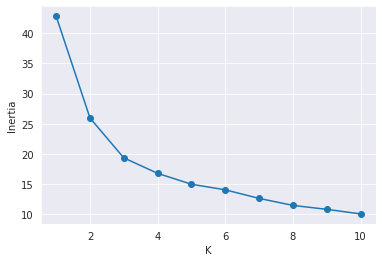

In [ ]:
def eval_Kmeans(x, k, r):
    """
    Evaluates the KMeans clustering for a given number of clusters (k)
    and random seed (r), returning the inertia (sum of squared distances
    of samples to their closest cluster center).

    Parameters:
    - x: Data to be clustered.
    - k: Number of clusters.
    - r: Random state for reproducibility.

    Returns:
    - inertia: Sum of squared distances within clusters.
    """
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    """
    Plots the inertia (within-cluster variance) against the number of
    clusters to help determine the optimal number of clusters (the 'elbow' point).

    Parameters:
    - x: Data to be clustered.
    - max_k: Maximum number of clusters to evaluate (default is 10).
    - r: Random state for reproducibility (default is 123).
    """
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(df_scaled) # Plot elbow curve using scaled dataset

As we can see the elbow or a knee like bend is at 4.

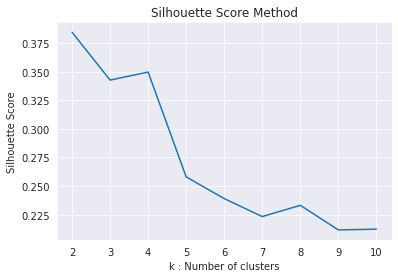

In [ ]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

From the above two plots we select:
- K: clusters = 4

## Fitting K-Means Model to selected K value

In [ ]:
# Fitting K-means model
# Remember to set the random_state to rseed
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=rseed)
kmeans.fit(df_scaled)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [ ]:
# Count the number of observations in each cluster
pd.Series(kmeans.labels_).value_counts()

2    88
1    46
3    30
0     3
dtype: int64

Now we are going to check how our model is performing using the silhouette coefficient.

In [ ]:
# Check model performance with the silhouette coefficient
metrics.silhouette_score(df_scaled, kmeans.labels_)

0.34967581498248707

## Predictions

In [ ]:
# Add the predicted cluster label column to the original dataframe
preds = kmeans.labels_
kmeans_df = pd.DataFrame(org_df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2


## Visualisation of clusters

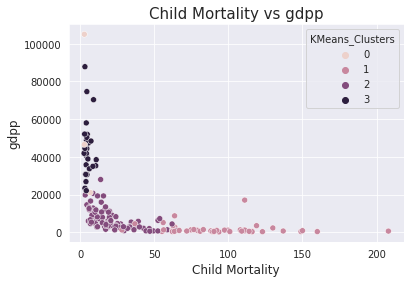

In [ ]:
# Visualisation of clusters: child mortality vs gdpp
sns.scatterplot(x=kmeans_df['child_mort'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df)
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

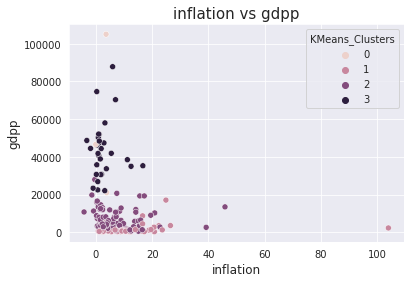

In [ ]:
# Visualisation of clusters: inflation vs gdpp
sns.scatterplot(x=kmeans_df['inflation'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df)
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use terms such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


##**Conclusion from Clusters Graph**
Based on the clusters graph, we can draw the following conclusions:

1. Countries with high child mortality, low GDP per capita, and low inflation (measured as the annual growth rate of total GDP) are classified as underdeveloped countries, facing significant economic and healthcare challenges.
2. Countries with low child mortality, high GDP per capita, and high inflation are classified as developed countries, characterized by strong economies and advanced healthcare systems, despite elevated inflation rates.


**Cluster Descriptions**

1. Cluster 0: High GDP per capita, low child mortality, moderate inflation → Represents developed countries with robust economies, advanced healthcare systems, and stable inflation rates, enabling high living standards and low mortality.

2. Cluster 1: Medium GDP per capita, moderate child mortality → Corresponds to upper-middle-income developing countries with growing economies and improving healthcare access, reflecting progress toward development.

3. Cluster 2: Low GDP per capita, high child mortality → Characterizes underdeveloped countries with significant economic constraints and limited healthcare infrastructure, leading to elevated child mortality rates.

4. Cluster 3: Lower-medium GDP per capita, slightly elevated child mortality → Reflects lower-middle-income developing countries with modest economic growth and ongoing improvements in healthcare, showing transitional development stages.